In [1]:
import numpy as np
import pandas as pd

from plot import plot_confusion_matrix_a

In [2]:
from neuralnet import MLPGlaustonKERAS2015

Using TensorFlow backend.


In [3]:
df_trein_s = pd.read_csv("entradas_trein_S.txt", sep="   ", header=None)
df_trein_ns = pd.read_csv("entradas_trein_NS.txt", sep="   ", header=None)

df_trein_inst_ns_pdf_ns = df_trein_ns[0:1051]
df_trein_inst_ns_pdf_s = df_trein_s[0:1051]

df_trein_inst_s_pdf_ns = df_trein_ns[1051:2102]
df_trein_inst_s_pdf_s = df_trein_s[1051:2102]

X_trein_inst_ns_pdf_ns = df_trein_inst_ns_pdf_ns.values
X_trein_inst_ns_pdf_s = df_trein_inst_ns_pdf_s.values
X_trein_inst_ns = np.concatenate([X_trein_inst_ns_pdf_ns, X_trein_inst_ns_pdf_s], axis=1)

X_trein_inst_s_pdf_ns = df_trein_inst_s_pdf_ns.values
X_trein_inst_s_pdf_s = df_trein_inst_s_pdf_s.values
X_trein_inst_s = np.concatenate([X_trein_inst_s_pdf_ns, X_trein_inst_s_pdf_s], axis=1) 

print("X_trein_inst_ns shape: ", X_trein_inst_ns.shape)
y_trein_inst_ns = np.zeros((X_trein_inst_ns.shape[0],1))

print("X_trein_inst_s: ", X_trein_inst_s.shape)
y_trein_inst_s = np.ones((X_trein_inst_s.shape[0],1))

X_trein = np.concatenate([X_trein_inst_ns, X_trein_inst_s])
y_trein = np.concatenate([y_trein_inst_ns, y_trein_inst_s])
np.save('X_train', X_trein)
np.save('y_train', y_trein)

X_trein_inst_ns shape:  (1051, 26)
X_trein_inst_s:  (1051, 26)


/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
df_test_s = pd.read_csv("entradas_teste_S.txt", sep="   ", header=None)
df_test_ns = pd.read_csv("entradas_teste_NS.txt", sep="   ", header=None)

df_test_inst_ns_pdf_ns = df_test_ns[0:32]
df_test_inst_ns_pdf_s = df_test_s[0:32]

df_test_inst_s_pdf_ns = df_test_ns[32:51]
df_test_inst_s_pdf_s = df_test_s[32:51]

X_test_inst_ns_pdf_ns = df_test_inst_ns_pdf_ns.values
X_test_inst_ns_pdf_s = df_test_inst_ns_pdf_s.values
X_test_inst_ns = np.concatenate([X_test_inst_ns_pdf_ns, X_test_inst_ns_pdf_s], axis=1)

X_test_inst_s_pdf_ns = df_test_inst_s_pdf_ns.values
X_test_inst_s_pdf_s = df_test_inst_s_pdf_s.values
X_test_inst_s = np.concatenate([X_test_inst_s_pdf_ns, X_test_inst_s_pdf_s], axis=1) 

print("X_test_inst_ns shape: ", X_test_inst_ns.shape)
y_test_inst_ns = np.zeros((X_test_inst_ns.shape[0],1))

print("X_trein_inst_s: ", X_trein_inst_s.shape)
y_test_inst_s = np.ones((X_test_inst_s.shape[0],1))

X_test = np.concatenate([X_test_inst_ns, X_test_inst_s])
y_test = np.concatenate([y_test_inst_ns, y_test_inst_s])
np.save('X_test', X_test)
np.save('y_test', y_test)

X_test_inst_ns shape:  (32, 26)
X_trein_inst_s:  (1051, 26)


/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [5]:
mlp = MLPGlaustonKERAS2015()

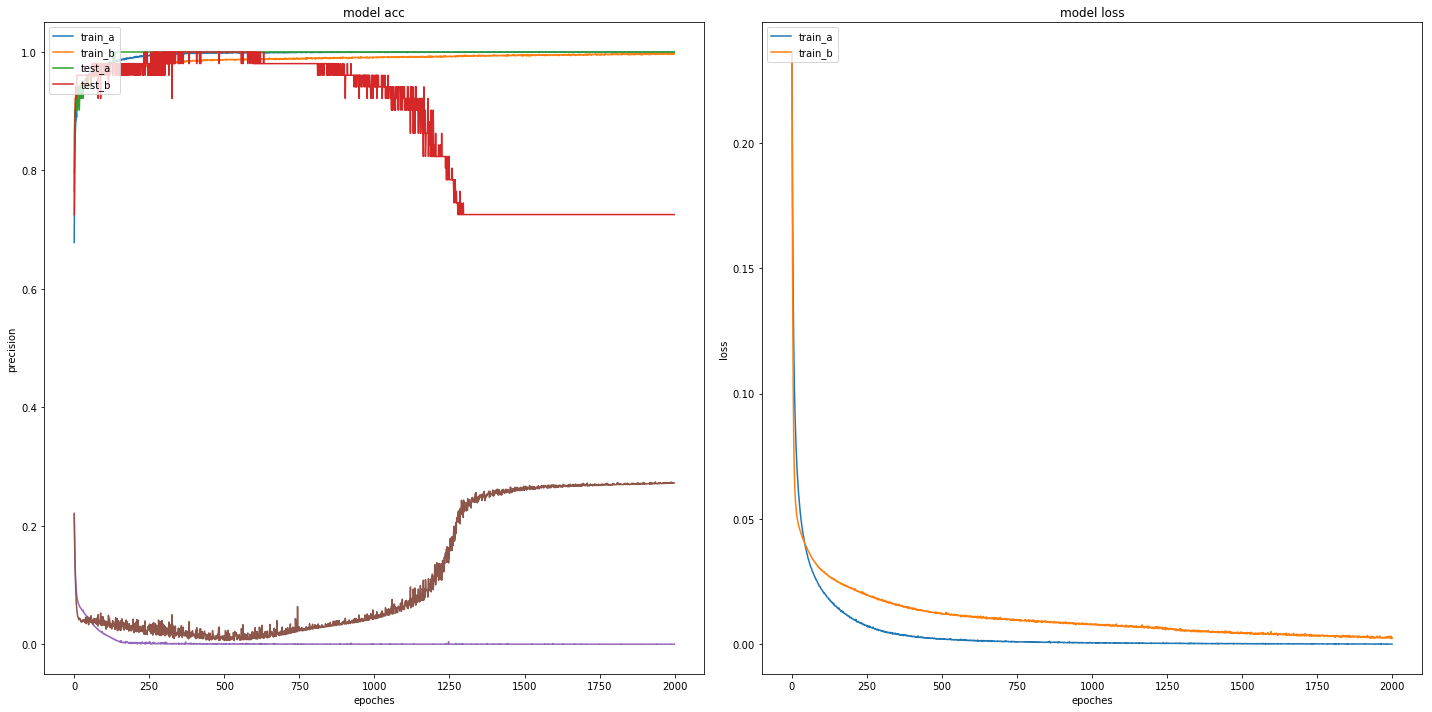

In [6]:
eval_set = (X_test, y_test)
mlp.fit(X=X_trein, y=y_trein, eval_set=eval_set) 

In [7]:
predict = mlp.predict(X_test)

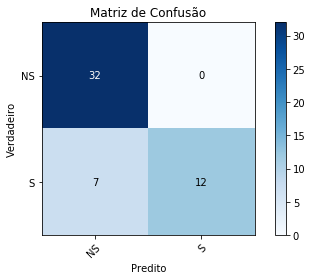

In [8]:
plot_confusion_matrix_a(y_test,
                        predict,
                        classes=['NS', 'S'],
                        title='Matriz de Confusão')